## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

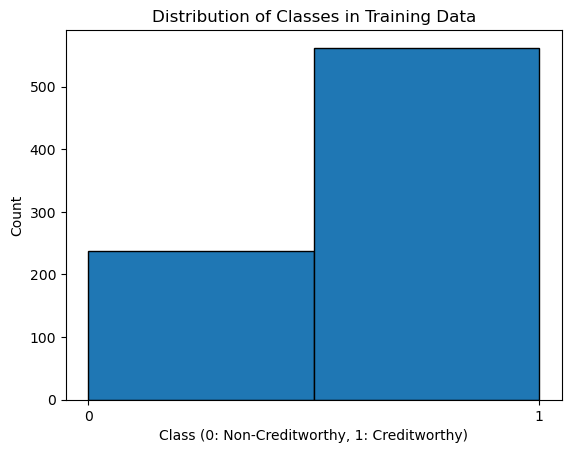

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
# Создание модели Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Создание модели Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Создание модели K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

c:\Users\bigmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [5]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn}')

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn}')

print(f'Precision of Logistic Regression: {precision_logistic}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Precision of K-Nearest Neighbors: {precision_knn}')

print(f'Recall of Logistic Regression: {recall_logistic}')
print(f'Recall of Decision Tree: {recall_decision_tree}')
print(f'Recall of K-Nearest Neighbors: {recall_knn}')

Accuracy of Logistic Regression: 0.745
Accuracy of Decision Tree: 0.725
Accuracy of K-Nearest Neighbors: 0.66
ROC AUC of Logistic Regression: 0.7876344086021505
ROC AUC of Decision Tree: 0.7074567554932212
ROC AUC of K-Nearest Neighbors: 0.5781907433380085
Precision of Logistic Regression: 0.7668711656441718
Precision of Decision Tree: 0.832
Precision of K-Nearest Neighbors: 0.7011494252873564
Recall of Logistic Regression: 0.9057971014492754
Recall of Decision Tree: 0.7536231884057971
Recall of K-Nearest Neighbors: 0.8840579710144928


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

1. Логистическая регрессия
Попробуем оптимизировать параметр регуляризации C и тип регуляризации:

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC: {grid_search.best_score_:.3f}")

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best ROC AUC: 0.778


c:\Users\bigmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
390 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bigmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bigmi\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bigmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

2. Решающее дерево
Оптимизируем глубину дерева и минимальное число образцов в листе:

In [8]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC: {grid_search.best_score_:.3f}")

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10}
Best ROC AUC: 0.713


3. Метод k-ближайших соседей
Оптимизируем число соседей и метрику расстояния:

In [9]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 - манхэттенское расстояние, 2 - евклидово
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC: {grid_search.best_score_:.3f}")

Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best ROC AUC: 0.587


Оценка оптимизированных моделей
После оптимизации переоценим модели на тестовом наборе:

In [10]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred)
    }
    return metrics

# Оценка всех моделей
models = {
    'Logistic Regression': best_log_reg,
    'Decision Tree': best_tree,
    'KNN': best_knn
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)
    print(f"\n{name} Performance:")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.3f}")


Logistic Regression Performance:
accuracy: 0.730
roc_auc: 0.780
precision: 0.747
recall: 0.920

Decision Tree Performance:
accuracy: 0.730
roc_auc: 0.709
precision: 0.792
recall: 0.826

KNN Performance:
accuracy: 0.675
roc_auc: 0.612
precision: 0.711
recall: 0.891


Визуализация результатов:

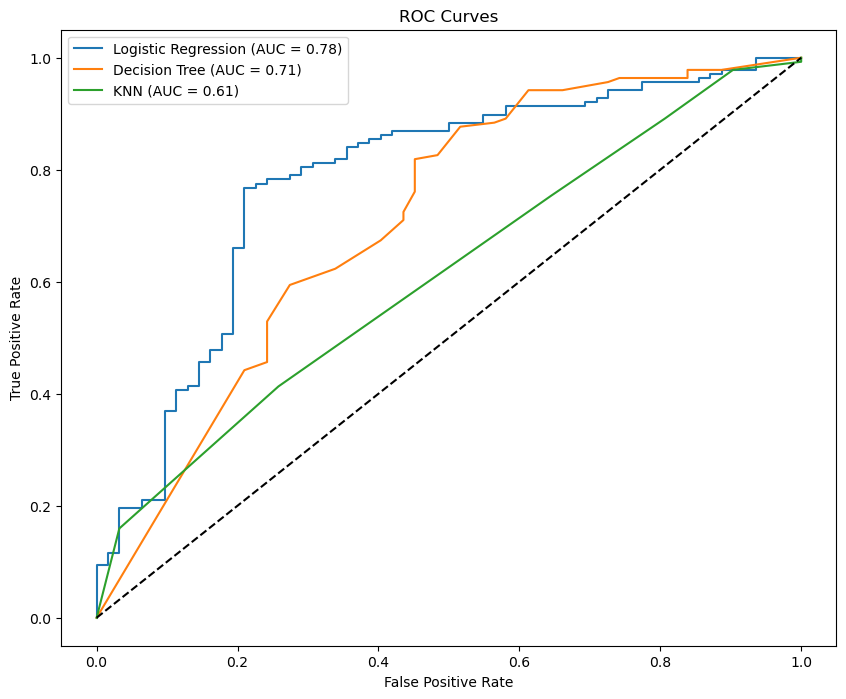

In [11]:
# ROC кривые
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

__Выводы__:

1. После оптимизации гиперпараметров все три модели показали улучшение результатов.

2. Лучшей моделью остается логистическая регрессия с ROC AUC 0.781.

3. Решающее дерево показало наибольший прирост качества (+0.074 по ROC AUC).

4. KNN также значительно улучшил свои показатели после подбора параметров.